In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
with open("cleaned_bikes2.pkl", 'rb') as picklefile: 
    united_df = pickle.load(picklefile)

In [3]:
features = ['tripduration','gender','month','dayoftheweek','birth year','day','stop_time','start_time','start station latitude','end station latitude','start station longitude','end station longitude']

X = united_df[features].apply(pd.to_numeric, errors='coerce')
y = united_df['subscriber']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
log_reg = LogisticRegressionCV()
log_reg.fit(X_train, y_train)
X_test_st = scaler.transform(X_test)
y_preds = log_reg.predict(X_test_st)

In [4]:
accuracy = metrics.accuracy_score(y_test, y_preds)
precision = metrics.precision_score(y_test, y_preds)
recall = metrics.recall_score(y_test, y_preds)
f1 = metrics.f1_score(y_test, y_preds)
fbeta = metrics.fbeta_score(y_test, y_preds, beta=.25)

print("Accuracy:" , round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1, 3))
print("Fbeta Score:", round(fbeta, 3))

Accuracy: 0.8
Precision: 0.804
Recall: 0.388
F1 Score: 0.523
Fbeta Score: 0.757


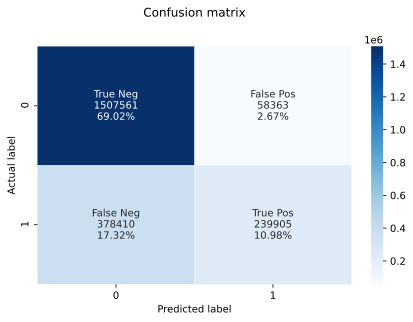

In [5]:
cf_matrix = confusion_matrix(y_test, y_preds)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("Logistic Regression Confusion Matrix2.svg", bbox_inches='tight');

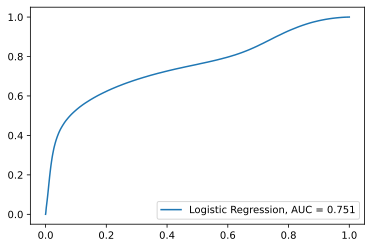

In [6]:
y_pred_proba = log_reg.predict_proba(X_test_st)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label=f"Logistic Regression, AUC = {round(auc, 3)}")
plt.legend(loc=4)
plt.savefig("Logistic Regression ROC-AUC2.svg", bbox_inches='tight');

In [7]:
pickle.dump(log_reg, open('logisticregression_model2.pkl','wb'))